In [2]:
import numpy as np

rib_num=2
tRNA_num=41
tRNA_cog=1
reaction_time = 0 
elong_times = list()
ribosome_react_list = np.zeros(rib_num)
print(ribosome_react_list)
for i in range(100):
    cog_bind = False
    total_time = 0
    while not cog_bind:
        reacting_ID = np.random.randint(tRNA_num+1)
        if  reacting_ID<tRNA_num:
            total_time += np.random.exponential(1.4)
        else:
            cog_time = np.random.uniform(0,1.4)
            if cog_time<1:
                cog_bind=True
            total_time+=cog_time
    elong_times.append(total_time)
print(elong_times)
print(np.average(elong_times))
    

[0. 0.]
[71.50453431225037, 3.6873680358081793, 258.54551134044567, 83.26173781168569, 19.15672706651348, 32.83932905684998, 17.85622019068036, 89.95031970589798, 33.547349010143, 32.466703035957636, 74.68785677042811, 13.076523031177828, 50.890473063709585, 76.92808180173932, 16.873983269009965, 299.18414597727894, 80.97426266323627, 56.46380130978168, 74.49358095161725, 51.76825740894159, 108.322832538028, 18.19226630851615, 2.6129499809340944, 46.45366881039607, 31.447981749185875, 73.01252815829227, 35.272538917393476, 341.1418419602886, 45.287261712220065, 26.14291789153855, 166.2294141219479, 25.221458733366592, 250.37703911718808, 51.4634076690398, 64.8700113277402, 46.20789638449883, 0.4459638104174894, 257.11501011722413, 87.03973105385629, 10.215630547321506, 275.5099881145842, 20.34647841327624, 208.85598147025084, 62.664666538936316, 23.86553742058375, 118.15740165573496, 18.171142293142037, 2.3022212262611355, 64.64097575161132, 180.18000898136398, 11.790093372136397, 11.1

In [3]:
np.random.exponential(1000/717,rib_num)

array([0.00442115, 0.18318869])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
def react_sim(rib_num=1,tRNA_cog=1,repeatAllowed=True):
    import numpy as np

    #arbitrarily pick rib_id = 0 as cognate ribosome
    #arbitrarily pick tRNA ids 0 to N as cognate tRNAs
    tRNA_id=np.arange(42)
    elong_times = list()
    cog_bind=False;
    sys_t=0
    rxns=0
    
    ## Randomly pick tRNA to be bound to all ribosomes from all possible tRNA.
    tRNA_bound=np.random.choice(tRNA_id,rib_num,replace=False)
    tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]

    ## For each ribosome, now with a reacting tRNA, pick an exponential random time until dissociation
    react_time = np.random.exponential(1000/717,rib_num)
    
    ## Dealing with the case of cog tRNA binding to cog ribosome
    if tRNA_bound[0] in np.arange(tRNA_cog) and np.random.uniform(0,1)<1475/(1475+717):
        cog_bind=True
        sys_t+=np.random.exponential(1000/1475)
        return sys_t,rxns
        
    #### Loop while cognate tRNA isn't bound to cognate ribosome successfully
    while not cog_bind:
        ###Find next event (a tRNA unbinding from a ribosome) and jump the system to this time
        next_rib_time = min(react_time)
        next_rib = np.argmin(react_time)
        just_unbound_tRNA = tRNA_bound[next_rib]

        if(next_rib==0):
            rxns+=1
        ##Adjust all pending reaction times by change in system time
        sys_t+= next_rib_time
        react_time = react_time - np.ones(rib_num)*next_rib_time
        
        ##Pick new tRNA to be bound to recently unbound ribosome
        if repeatAllowed:
            next_tRNA = np.random.choice(np.concatenate((tRNA_unbound,[just_unbound_tRNA])))
        else:
            next_tRNA = np.random.choice(tRNA_unbound)

        tRNA_bound[next_rib] = next_tRNA
        tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]
        
            
        ##Pick a reaction time for the newly bound tRNA
        react_time[next_rib] = np.random.exponential(1000/717)


        ##If tRNA that's newly bound is a cog tRNA and its bound at the cognate ribosome, see if the cog_binding is successful
        if tRNA_bound[0] in np.arange(tRNA_cog) and next_rib==0:
            if np.random.uniform(0,1)<1475/(1475+717):
                sys_t+=np.random.exponential(1000/1475)
                return sys_t,rxns
                
    return sys_t,rxns

In [5]:
sim_times=list()
rxn_count = list()
for i in range(100000):
    rxn = react_sim(rib_num=1,tRNA_cog=42)
    sim_times.append(rxn[0])
    rxn_count.append(rxn[1])
print(np.average(sim_times))
print(np.average(rxn_count))
#Sanity check with 1 ribosome and 42 tRNA cog:
#sim_time = 1.358 = 0.673*(0.678)+0.327(1.4)+0.327(0.673*(0.678)+0.327(1.4))+0.327^2(0.673*(0.678)+0.327(1.4))+0.327^3(0.673*(0.678)+0.327(1.4))+0.327^4(0.673*(0.678)+0.327(1.4))+0.327^5(0.673*(0.678)+0.327(1.4))+0.327^6(0.673*(0.678)+0.327(1.4))=
#reactions: 0.47=0.32+0.32^2+0.32^3+0.32^4+0.32^5+0.32^6+0.32^7+0.32^8+0.32^9

1.3547397491383828
0.48361


In [6]:
sim_times=list()
rxn_count = list()
for i in range(100):
    rxn = react_sim(rib_num=40,tRNA_cog=1)
    sim_times.append(rxn[0])
    rxn_count.append(rxn[1])
print(np.average(sim_times))
print(np.average(rxn_count))
#Sanity check with 1 ribosome and 42 tRNA cog:
#sim_time = 1.358 = 0.673*(0.678)+0.327(1.4)+0.327(0.673*(0.678)+0.327(1.4))+0.327^2(0.673*(0.678)+0.327(1.4))+0.327^3(0.673*(0.678)+0.327(1.4))+0.327^4(0.673*(0.678)+0.327(1.4))+0.327^5(0.673*(0.678)+0.327(1.4))+0.327^6(0.673*(0.678)+0.327(1.4))=
#reactions: 0.47=0.32+0.32^2+0.32^3+0.32^4+0.32^5+0.32^6+0.32^7+0.32^8+0.32^9

104.57846843314545
74.6


In [7]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(5000):
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

[86.98947532441441, 42.23522575055318, 28.11394333609707, 21.083654773363627, 16.5436006244788, 13.74413434858312]
[24.16069085 10.64983571  5.58285489  2.82118226  1.27894608  0.5156328 ]
45.00914260053468
[85.60657345360434, 43.02658256936126, 27.804732064270123, 20.43557950386162, 17.341317638059188, 13.68966662414564]
[23.77659997 10.84938052  5.52145185  2.73446397  1.34061567  0.51358936]
44.73610134104473
[86.64930790577154, 42.19596817794798, 28.431645395147054, 21.02558135313262, 16.67846924613662, 13.773173572894605]
[24.06621184 10.63993671  5.64594403  2.81341151  1.28937245  0.51672225]
44.97159879843129
[85.8772786582134, 43.40185284362082, 28.86121293349208, 20.77946751953222, 16.906071988700717, 13.91553724795187]
[23.85178636 10.94400691  5.73124737  2.78047927  1.30696787  0.52206325]
45.136551037354266
[86.63354176075283, 43.85188624754065, 28.137766437525563, 20.841285174002962, 16.457076269138923, 14.038488897644946]
[24.06183291 11.05748521  5.58758568  2.78875103

In [8]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(1000):
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA,repeatAllowed=False)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

[90.5022105227968, 43.44302242640694, 27.524106147993567, 19.201685558335193, 16.668646600962713, 13.513130165668539]
[25.13632737 10.95438804  5.46572528  2.56935789  1.28861308  0.50696632]
45.921377975093684
[88.20650068340206, 42.811749959994444, 27.57815723033522, 19.391454754191898, 16.095756694995625, 13.584557611162829]
[24.49871075 10.79520934  5.47645872  2.59475071  1.24432434  0.50964603]
45.11909988723527
[84.2236919807638, 43.217240421970125, 28.463729866563916, 20.368796009105377, 16.00841965551101, 13.32512451180234]
[23.39251475 10.89745591  5.65231535  2.72552774  1.23757252  0.49991299]
44.40529926388554
[81.46453016269693, 42.79810899970025, 27.507993761718076, 20.577651991243545, 16.6294992371146, 13.626881018797894]
[22.62617772 10.7917697   5.46252569  2.75347455  1.28558669  0.51123386]
43.43076821140015
[82.74491317128913, 43.95933038875769, 29.125387642568786, 21.145049003250534, 15.628498522550831, 13.865362131795163]
[22.98179474 11.08457782  5.78370707  2.8

In [9]:
22.548773651683703*1.62235994e-01

3.658222706861915

In [10]:
count=0
tot_count=0
for i in range(50000):
    ## Randomly pick tRNA to be bound to all ribosomes from all possible tRNA.
    tRNA_bound=np.random.choice(tRNA_id,rib_num,replace=False)
    tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]
    ## For each ribosome, now with a reacting tRNA, pick an exponential random time until dissociation

    react_time = np.ones(rib_num)*np.random.exponential(1.4)
    ## Dealing with the case of cog tRNA binding to cog ribosome
    if 0 in tRNA_bound[0:tRNA_cog]:
        cog_time_f = np.random.uniform(0,0.68)
        cog_time_b = np.random.uniform(0,1.4)
        tot_count+=1
        if np.random.uniform(0,1)<1475/(1475+717):
            cog_bind=True
            react_time[0] = cog_time_f
            count+=1
        else:
            react_time[0] = cog_time_b 
        total_time+=cog_time
print(count, ' ', tot_count, ' ',count/tot_count)

NameError: name 'tRNA_id' is not defined

In [ ]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(2):
            print(num_rib)
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

Text(0.5, 1.0, 'Simulations with instant self-mixing')

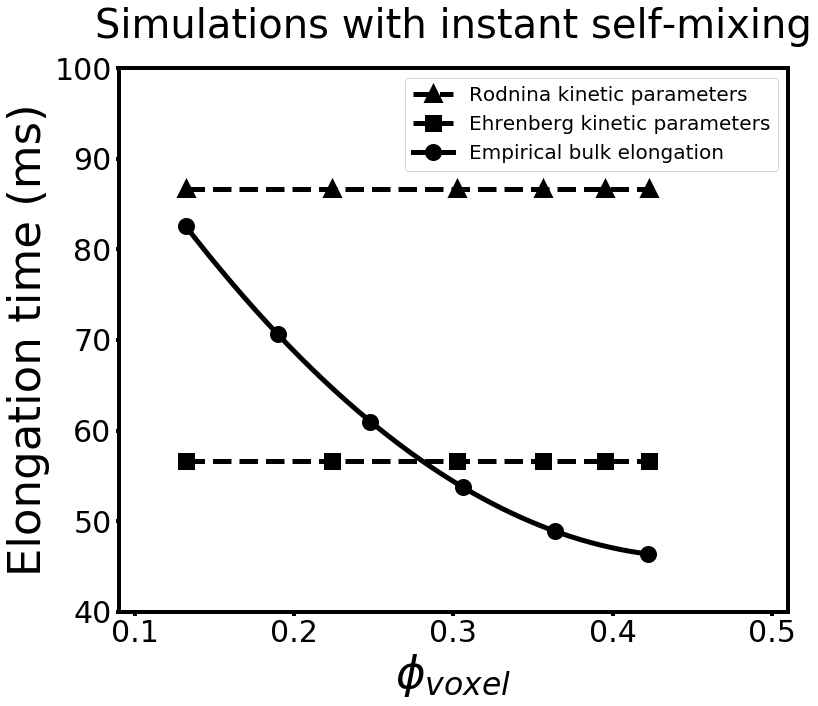

In [502]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
x=[0.132,0.224,0.302,0.356,0.395,0.423]
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/20,1000/21,1000/22],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x,np.array([45,45,45,45,45,45]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='^',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Rodnina kinetic parameters')
ax.plot(x,np.array([45/3,45/3,45/3,45/3,45/3,45/3]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='s',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Ehrenberg kinetic parameters')
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=12,markeredgewidth=5,markevery=199,linewidth=5,color='black',label='Empirical bulk elongation')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax.set_ylim(40,100)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Elongation time (ms)',size=45,color='black')
ax.legend()
ax.legend( prop={'size': 20})
plt.title('Simulations with instant self-mixing',size=40,pad=30)

#Super-physical simulations

Text(0.5, 1.0, 'Simulations with instant self-mixing &\n ~3x cognate tRNA bias')

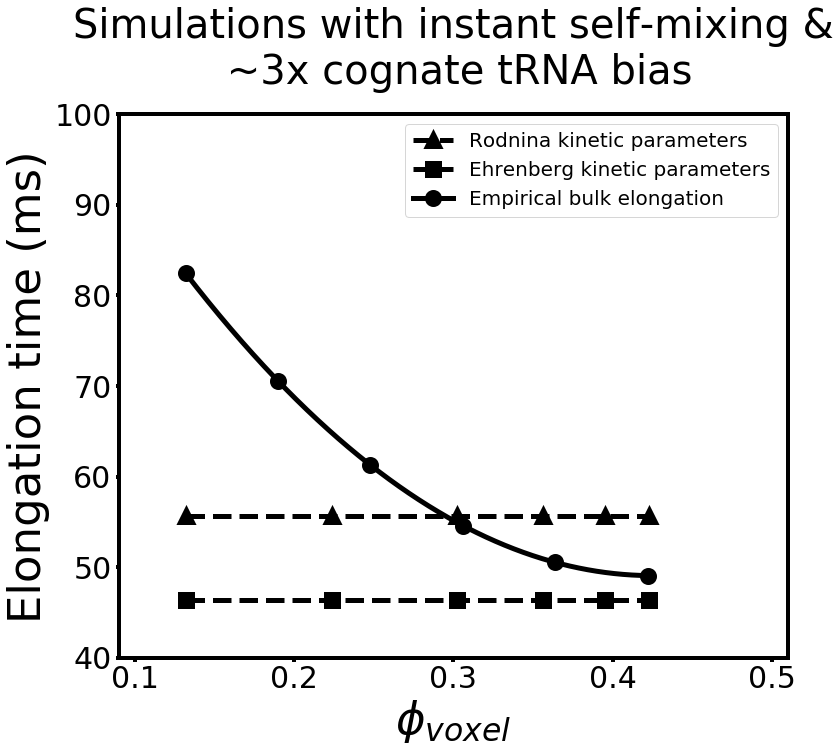

In [515]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
x=[0.132,0.224,0.302,0.356,0.395,0.423]
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x,np.array([14,14,14,14,14,14]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='^',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Rodnina kinetic parameters')
ax.plot(x,np.array([14/3,14/3,14/3,14/3,14/3,14/3]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='s',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Ehrenberg kinetic parameters')
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=12,markeredgewidth=5,markevery=199,linewidth=5,color='black',label='Empirical bulk elongation')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax.set_ylim(40,100)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Elongation time (ms)',size=45,color='black')
ax.legend()
ax.legend( prop={'size': 20})
plt.title('Simulations with instant self-mixing &\n ~3x cognate tRNA bias',size=40,pad=30)

#Super-physical simulations

#show with 6 tRNA, 5 tRNA, 4 tRNA; calculate how much bias this is

In [ ]:
14,17,21,28